# Project: Univariate Linear Regression

## Gold Price Prediction

## Linear Regression With One Variable

In this project we are going to implement Linear Regression. And as an example we are going to use Gold Price data to predict prices on the basis of Previous Prices..

## Tools
In this Lab , we will make use of :
* NumPy, a popular library for scientific computing
* Matplotlib, a popular library for plotting data
* Pandas, a popular library for getting the data from Excel File

In [26]:
import pandas as pd
import math
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
#from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients, super_bowl
#plt.style.use('./deeplearning.mplstyle')

In [27]:
# Load Our Data Set
Data = pd.read_excel("Prices.xlsx",sheet_name="Monthly_Full",usecols=["Date","USD"])
Data

,Date,USD
0,1969-12-31,35.20
1,1970-01-30,34.99
2,1970-02-27,35.02
3,1970-03-31,35.30
4,1970-04-30,35.85
...,...,...
632,2022-08-31,1715.90
633,2022-09-30,1671.75
634,2022-10-31,1639.00
635,2022-11-30,1753.50


# Plotting the Data
Plot the data ussing scatter plot

In [28]:
import datetime as dt
Data['Date'] = pd.to_datetime(Data['Date'])
Data['Date_1']=Data['Date'].map(dt.datetime.toordinal)
Data

,Date,USD,Date_1
0,1969-12-31,35.20,719162
1,1970-01-30,34.99,719192
2,1970-02-27,35.02,719220
3,1970-03-31,35.30,719252
4,1970-04-30,35.85,719282
...,...,...,...
632,2022-08-31,1715.90,738398
633,2022-09-30,1671.75,738428
634,2022-10-31,1639.00,738459
635,2022-11-30,1753.50,738489


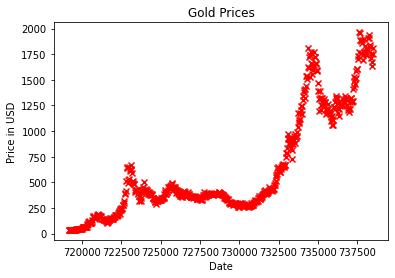

In [29]:
import matplotlib.pyplot as plt
x_train= Data["Date_1"]
y_train=Data["USD"]
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Gold Prices")
# Set the y-axis label
plt.ylabel('Price in USD')
# Set the x-axis label
plt.xlabel('Date')
plt.show()

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


In [30]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

## Gradient descent 
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

### compute_gradient
<a name='ex-01'></a>
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. The embedded comments describe the operations.

In [31]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

###  Gradient Descent
Now that gradients can be computed,  gradient descent, described in equation (3) above can be implemented below in `gradient_descent`. The details of the implementation are described in the comments. Below, you will utilize this function to find optimal values of $w$ and $b$ on the training data.

In [32]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):     
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [33]:
X_new = x_train/np.max(x_train)
Y_new = y_train/np.max(y_train)

# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-3
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X_new ,Y_new, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
#print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")
#print(w_final)

Iteration    0: Cost 8.46e-02  dj_dw: -3.150e-01, dj_db: -3.175e-01   w:  3.150e-04, b: 3.17459e-04
Iteration 1000: Cost 3.51e-02  dj_dw: -4.439e-02, dj_db: -4.329e-02   w:  1.380e-01, b: 1.38101e-01
Iteration 2000: Cost 3.41e-02  dj_dw: -6.880e-03, dj_db: -5.285e-03   w:  1.578e-01, b: 1.56485e-01
Iteration 3000: Cost 3.41e-02  dj_dw: -1.680e-03, dj_db: -1.624e-05   w:  1.612e-01, b: 1.58317e-01
Iteration 4000: Cost 3.41e-02  dj_dw: -9.588e-04, dj_db:  7.142e-04   w:  1.624e-01, b: 1.57855e-01
Iteration 5000: Cost 3.41e-02  dj_dw: -8.588e-04, dj_db:  8.154e-04   w:  1.633e-01, b: 1.57074e-01
Iteration 6000: Cost 3.41e-02  dj_dw: -8.450e-04, dj_db:  8.294e-04   w:  1.642e-01, b: 1.56250e-01
Iteration 7000: Cost 3.41e-02  dj_dw: -8.430e-04, dj_db:  8.314e-04   w:  1.650e-01, b: 1.55419e-01
Iteration 8000: Cost 3.41e-02  dj_dw: -8.427e-04, dj_db:  8.316e-04   w:  1.659e-01, b: 1.54588e-01
Iteration 9000: Cost 3.41e-02  dj_dw: -8.427e-04, dj_db:  8.316e-04   w:  1.667e-01, b: 1.53756e-01


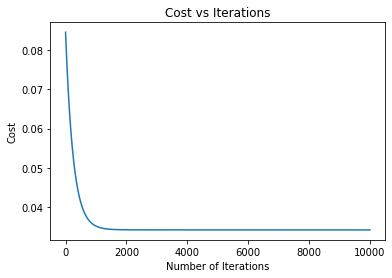

In [34]:
plt.plot(np.arange(len(J_hist)),J_hist)
plt.title("Cost vs Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [35]:
import plotly.express as px

In [36]:
cost_and_iteration = {"Cost": J_hist, "Iterations": np.arange(0, len(J_hist))}
dataframe_cost_iterations = pd.DataFrame(cost_and_iteration)
fig4 = px.line(dataframe_cost_iterations, x="Iterations", y="Cost", title='Cost vs Iterations or Learning Curve')
fig4.show()

In [37]:
print("W_Final",w_final)
print("B_Final",b_final)

W_Final 0.16756133058330872
B_Final 0.15292519967656826


# Date to Ordinal Number Conversion :

In [38]:
def DatetoOrdinal(sdate):
  ordinalno=dt.datetime.toordinal(pd.to_datetime(sdate))
  return ordinalno

# Prediction

In [ ]:
sdate = input("Enter the Date (yyyy-MM-dd) : ")
print("ThePrediction for GoldPrice on {0} is : {1} ".format(sdate,w_final*DatetoOrdinal(sdate)+b_final))